In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

In [2]:
table_nm = 'DLAB_INTERN_TR_IFO_TMP' 
names = ['iqr_dt','cus_no','act_no','mkt_gb','pdt_gb','iem_cd','iem_krl_anm','bnc_qty','tot_aet_amt'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE3060/{table_nm}3_3060.csv' 
df_trd_36 = pd.read_csv(file_path) 

table_nm = 'DLAB_HT_L1_CUS_IFO_TMP' 
names = ['cus_no','sex_dit_cd','cus_age','zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE3060/{table_nm}_3060.csv' 
df_cus_36 = pd.read_csv(file_path) 

table_nm = 'DLAB_HT_L1_ACT_IFO_TMP' 
names = ['act_no','cus_no','act_opn_ym'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE3060/{table_nm}_3060.csv' 
df_act_36 = pd.read_csv(file_path) 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_act_36 = df_act_36.drop('Unnamed: 0', axis=1)
df_cus_36 = df_cus_36.drop('Unnamed: 0', axis=1)
df_trd_36 = df_trd_36.drop('Unnamed: 0', axis=1)

In [4]:
table_nm = 'DLAB_INTERN_TR_IFO_TMP' 
names = ['iqr_dt','cus_no','act_no','mkt_gb','pdt_gb','iem_cd','iem_krl_anm','bnc_qty','tot_aet_amt'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}_1030.csv' 
df_trd_13_1 = pd.read_csv(file_path)

table_nm = 'DLAB_INTERN_TR_IFO_TMP' 
names = ['iqr_dt','cus_no','act_no','mkt_gb','pdt_gb','iem_cd','iem_krl_anm','bnc_qty','tot_aet_amt'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}2_1030.csv' 
df_trd_13_2 = pd.read_csv(file_path) 


table_nm = 'DLAB_HT_L1_CUS_IFO_TMP' 
names = ['cus_no','sex_dit_cd','cus_age','zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}_1030.csv' 
df_cus_13 = pd.read_csv(file_path) 

table_nm = 'DLAB_HT_L1_ACT_IFO_TMP' 
names = ['act_no','cus_no','act_opn_ym'] 
file_path = f'/home/sbx/data/DATA0113/DATA/AGE1030/{table_nm}_1030.csv' 
df_act_13 = pd.read_csv(file_path) 

In [5]:
df_trd_13 = pd.merge(left=df_trd_13_1, right=df_trd_13_2[df_trd_13_2['iqr_dt'] > 20210701], how='outer')

In [6]:
df_act_13 = df_act_13.drop('Unnamed: 0', axis=1)
df_cus_13 = df_cus_13.drop('Unnamed: 0', axis=1)
df_trd_13 = df_trd_13.drop('Unnamed: 0', axis=1)

In [7]:
#choose 440 customers with trd data & remove 이상한 데이터 (customers with US25459W4583)
df_cus_13_w = df_cus_13.copy()[(df_cus_13['cus_no'].isin(df_trd_13['cus_no'])) & ~(df_cus_13['cus_no'].isin(df_trd_13[(df_trd_13['iem_cd'] == "US25459W4583") & (df_cus_13['cus_age'] < 27)]['cus_no']))]

In [8]:
#choose 440 customers with trd data & remove 이상한 데이터 (customers with US25459W4583)
df_cus_36_w = df_cus_36.copy()[(df_cus_36['cus_no'].isin(df_trd_36['cus_no'])) & ~(df_cus_36['cus_no'].isin(df_trd_36[(df_trd_36['iem_cd'] == "US25459W4583")]['cus_no']))]

In [9]:
df_bal_13 = df_trd_13.copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal_13 = df_bal_13.reset_index()
df_bal_kor_13 = df_trd_13[df_trd_13['mkt_gb'] == '국내'].copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal_kor_13 = df_bal_kor_13.reset_index()
df_bal_ovs_13 = df_trd_13[df_trd_13['mkt_gb'] == '해외'].copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal_ovs_13 = df_bal_ovs_13.reset_index()

In [10]:
df_bal_36 = df_trd_36.copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal_36 = df_bal_36.reset_index()
df_bal_kor_36 = df_trd_36[df_trd_36['mkt_gb'] == '국내'].copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal_kor_36 = df_bal_kor_36.reset_index()
df_bal_ovs_36 = df_trd_36[df_trd_36['mkt_gb'] == '해외'].copy()[['iqr_dt', 'cus_no', 'tot_aet_amt']].groupby(['iqr_dt', 'cus_no']).sum()
df_bal_ovs_36 = df_bal_ovs_36.reset_index()

In [11]:
df_bal_tot_13 = pd.merge(left=df_bal_13, 
                      right=df_bal_kor_13[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_kr'), 
                      how='left')
df_bal_tot_13 = pd.merge(left=df_bal_tot_13, 
                      right=df_bal_ovs_13[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_ov'), 
                      how='left')

In [12]:
df_bal_tot_36 = pd.merge(left=df_bal_36, 
                      right=df_bal_kor_36[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_kr'), 
                      how='left')
df_bal_tot_36 = pd.merge(left=df_bal_tot_36, 
                      right=df_bal_ovs_36[['iqr_dt','cus_no', 'tot_aet_amt']], 
                      on=['cus_no', 'iqr_dt'], 
                      suffixes=('', '_ov'), 
                      how='left')

In [13]:
df_bal_tot_13[['tot_aet_amt_kr', 'tot_aet_amt_ov']] = df_bal_tot_13[['tot_aet_amt_kr', 'tot_aet_amt_ov']].fillna(0)
df_bal_tot_36[['tot_aet_amt_kr', 'tot_aet_amt_ov']] = df_bal_tot_36[['tot_aet_amt_kr', 'tot_aet_amt_ov']].fillna(0)

In [14]:
df_bal_list_13 = []
for i in df_bal_tot_13['iqr_dt'].unique():
    df = df_bal_tot_13[df_bal_tot_13['iqr_dt'] == i]
    df = pd.merge(left=df_cus_13_w, right=df, on='cus_no', suffixes=('','')) #if how='left', customers who haven't opened an account appear
    df['ovs_ratio'] = df['tot_aet_amt_ov'] / df['tot_aet_amt']
    df_bal_list_13.append(df)

In [15]:
df_bal_list_36 = []
for i in df_bal_tot_36['iqr_dt'].unique():
    df = df_bal_tot_36[df_bal_tot_36['iqr_dt'] == i]
    df = pd.merge(left=df_cus_36_w, right=df, on='cus_no', suffixes=('','')) #if how='left', customers who haven't opened an account appear
    df['ovs_ratio'] = df['tot_aet_amt_ov'] / df['tot_aet_amt']
    df_bal_list_36.append(df)

In [16]:
ovs_pct_13 = []
for i in range(365):
    df = df_bal_list_13[i]
    ovs_pct_13.append(len(df[df['ovs_ratio'] > 0])/len(df))
ovs_pct_36 = []
for i in range(365):
    df = df_bal_list_36[i]
    ovs_pct_36.append(len(df[df['ovs_ratio'] > 0])/len(df))

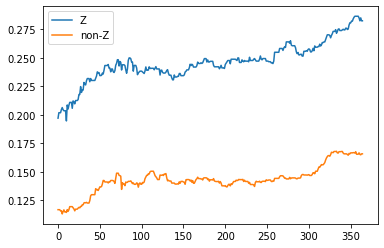

In [17]:
plt.plot(ovs_pct_13, label='Z')
plt.plot(ovs_pct_36, label='non-Z')
plt.legend()
plt.show()

In [18]:
df_trd_kk_13 = df_trd_13.copy()[df_trd_13['iem_krl_anm'] == '카카오']
df_trd_kk_13 = df_trd_kk_13[df_trd_kk_13['cus_no'].isin(df_cus_13[df_cus_13['cus_age'] < 28]['cus_no'])]
df_trd_kk_36 = df_trd_36.copy()[df_trd_36['iem_krl_anm'] == '카카오']

In [19]:
kk_13 = []
kk_36 = []
for i in df_trd_kk_13.groupby('iqr_dt').sum().index:
    kk_13.append(df_trd_kk_13.groupby('iqr_dt')['cus_no'].count()[i])
    kk_36.append(df_trd_kk_36.groupby('iqr_dt')['cus_no'].count()[i])
    if (len(kk_13) > 250):
        break

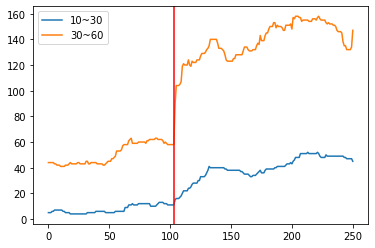

In [20]:
plt.plot(kk_13, label='10~30')
plt.plot(kk_36, label='30~60')
plt.axvline(x=103, color='r')
plt.legend()

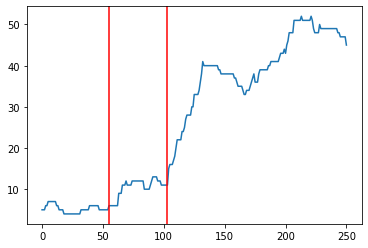

In [21]:
plt.plot(kk_13)
plt.axvline(x=55, color='r')
plt.axvline(x=103, color='r')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


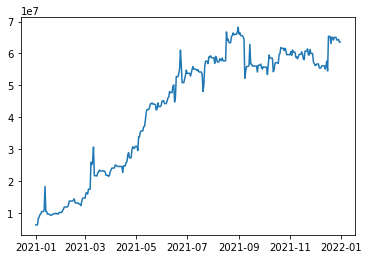

In [22]:
#Total investment of customers aged 10-30 into Kakao stocks
dkk = df_trd_kk_13.groupby('iqr_dt').sum()
plt.plot(pd.to_datetime(dkk.index, format='%Y%m%d'), dkk['tot_aet_amt'])

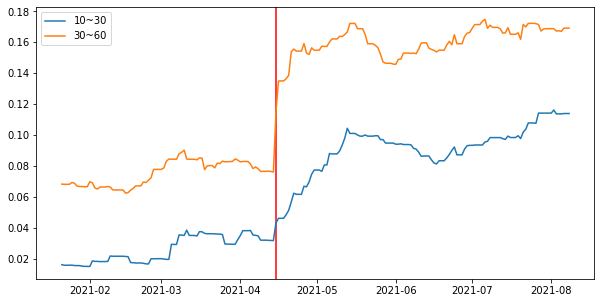

In [23]:
plt.figure(figsize=(10, 5))
dkk_13 = df_trd_kk_13.groupby('iqr_dt').agg(['nunique'])['cus_no']['nunique']/df_trd_13.groupby('iqr_dt').agg(['nunique'])['cus_no']['nunique']
dkk_36 = df_trd_kk_36.groupby('iqr_dt').agg(['nunique'])['cus_no']['nunique']/df_trd_36.groupby('iqr_dt').agg(['nunique'])['cus_no']['nunique']
plt.axvline(x=pd.to_datetime('20210415', format='%Y%m%d'), color='r')
plt.plot(pd.to_datetime(dkk_13.index[20:220], format='%Y%m%d'), dkk_13[20:220], label='10~30')
plt.plot(pd.to_datetime(dkk_36.index[20:220], format='%Y%m%d'), dkk_36[20:220], label='30~60')
plt.legend()

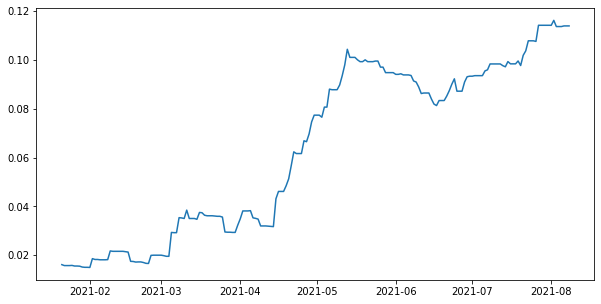

In [24]:
plt.figure(figsize=(10, 5))
#plt.axvline(x=pd.to_datetime('20210415', format='%Y%m%d'), color='r')
plt.plot(pd.to_datetime(dkk_13.index[20:220], format='%Y%m%d'), dkk_13[20:220], label='10~30')